# SVM

SVM的英文全称是Support Vector Machines，我们叫它支持向量机。支持向量机是我们用于分类的一种算法

## SVM原理

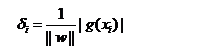

SVM 的核心思想是尽最大的努力使分开的两个类别有最大间隔，这样才使得分割具有更高的可信度。而且对于未知的新样本才有很好的分类预测能力。那么怎么描述这个间隔，并且让它最大呢？SVM 的办法是：让离分隔面最近的数据点具有最大的距离。

不同方向的最优决策面的分类间隔通常是不同的，那个具有“最大间隔”的决策面就是SVM要寻找的最优解。而这个真正的最优解对应的两侧虚线所穿过的样本点，就是SVM中的支持样本点，称为”支持向量”

超平面、约束条件、最优化目标函数、对偶转换（拉格朗日）、KKT

SMO

核函数就是通过非线性化映射在较高维度进行的线性化分割使得相当于在原本维度作了一个非线性化分割。

https://blog.csdn.net/weixin_39605679/article/details/81170300



## SVM文本分类

demo, 改造成文本

In [12]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts

#import our data
iris = datasets.load_iris()
X = iris.data
y = iris.target

#split the data to  7:3
X_train,X_test,y_train,y_test = ts(X,y,test_size=0.3)

# select different type of kernel function and compare the score

# kernel = 'rbf'
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train,y_train)
score_rbf = clf_rbf.score(X_test,y_test)
print("The score of rbf is : %f"%score_rbf)

# kernel = 'linear'
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,y_train)
score_linear = clf_linear.score(X_test,y_test)
print("The score of linear is : %f"%score_linear)

# kernel = 'poly'
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train,y_train)
score_poly = clf_poly.score(X_test,y_test)
print("The score of poly is : %f"%score_poly)

The score of rbf is : 1.000000
The score of linear is : 1.000000
The score of poly is : 0.933333


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn import svm
import random
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import numpy

#调整了格式，一行是一条数据
def inputdata(filename):
    f = open(filename,'r')
    linelist = f.readlines()
    return linelist

def splitset(trainset,testset):
    train_words = []
    train_tags = []
    test_words = []
    test_tags = []
    for i in trainset:
        i = i.strip()
        # index = i.index(':')
        train_words.append(i[:-2])
        # print i
        train_tags.append(int(i[-1]))

    for i in testset:
        i = i.strip()
        # index = i.index(':')
        test_words.append(i[:-2])
        # print i
        test_tags.append(int(i[-1]))

    return train_words,train_tags,test_words,test_tags

#完成打开文件后的准备工作

comma_tokenizer = lambda x: jieba.cut(x, cut_all=True)

def tfvectorize(train_words,test_words):
    v = TfidfVectorizer(tokenizer=comma_tokenizer,binary = False, decode_error = 'ignore',stop_words = 'english')
    train_data = v.fit_transform(train_words)
    test_data = v.transform(test_words)
    return train_data,test_data

#按比例划分训练集与测试集
def splitDataset(dataset,splitRatio):
    trainSize = int(len(dataset)*splitRatio)
    trainSet = []
    copy = dataset
    while len(trainSet)<trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return trainSet,copy

#得到准确率和召回率
def evaluate(actual, pred):
    m_precision = metrics.precision_score(actual, pred,average='macro')
    m_recall = metrics.recall_score(actual,pred,average='macro')
    print 'precision:{0:.3f}'.format(m_precision)
    print 'recall:{0:0.3f}'.format(m_recall)

#创建svm分类器
def train_clf(train_data, train_tags):
    clf = svm.SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3,
                  gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False)
    clf.fit(train_data, numpy.asarray(train_tags))

    return clf

def covectorize(train_words,test_words):
    v = CountVectorizer(tokenizer=comma_tokenizer,binary = False, decode_error = 'ignore',stop_words = 'english')
    train_data = v.fit_transform(train_words)
    test_data = v.transform(test_words)
    return train_data,test_data

if __name__ == '__main__':
    linelist = inputdata('data/newdata.txt')
    # for i in linelist:
    #     print i.decode('utf-8')

    # 划分成两个list
    trainset, testset = splitDataset(linelist, 0.65)
    # for i in trainset:
    #     print i.decode('utf-8')
    print 'train number:', len(trainset)
    print 'test number:', len(testset)

    train_words, train_tags, test_words, test_tags = splitset(trainset, testset)
    # for i in train_words:
    #     print i
    # for i in train_tags:
    #     print i
    # for i in numpy.asarray(train_tags):
    #     print i
    # for i in test_words:
    #     print i
    # for i in test_tags:
    #     print i


    # train_data, test_data = tfvectorize(train_words, test_words)
    train_data, test_data = covectorize(train_words, test_words)
    # for i in test_data:
    #     print i

    clf = train_clf(train_data,train_tags)

    re =  clf.predict(test_data)
    # print re
    evaluate(numpy.asarray(test_tags),re)